Let's start with a concrete example. Imagine you're managing a portfolio worth $1,000,000, and you have daily returns data for the past year (252 trading days):

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Simulate daily returns data
np.random.seed(42)
n_days = 252
returns = np.random.normal(0.0005, 0.01, (10000, n_days))  # 10000 simulations of 252 days

def analyze_portfolio_risk(returns, initial_value=1000000):
    """Analyze portfolio risk using order statistics"""
    # Calculate minimum returns (worst cases)
    worst_returns = np.min(returns, axis=1)
    
    # Calculate VaR at 95% confidence
    var_95 = np.percentile(returns, 5, axis=1)
    
    # Calculate maximum returns (best cases)
    best_returns = np.max(returns, axis=1)
    
    fig, axes = plt.subplots(3, 1, figsize=(12, 15))
    
    # Plot worst-case scenarios
    sns.histplot(worst_returns * initial_value, ax=axes[0])
    axes[0].set_title('Distribution of Maximum Losses')
    axes[0].axvline(np.mean(worst_returns) * initial_value, color='red', 
                    label=f'Mean Max Loss: ${np.mean(worst_returns) * initial_value:,.0f}')
    axes[0].legend()
    
    # Plot VaR
    sns.histplot(var_95 * initial_value, ax=axes[1])
    axes[1].set_title('Value at Risk (95% Confidence)')
    axes[1].axvline(np.mean(var_95) * initial_value, color='red',
                    label=f'Mean VaR: ${np.mean(var_95) * initial_value:,.0f}')
    axes[1].legend()
    
    # Plot best-case scenarios
    sns.histplot(best_returns * initial_value, ax=axes[2])
    axes[2].set_title('Distribution of Maximum Gains')
    axes[2].axvline(np.mean(best_returns) * initial_value, color='red',
                    label=f'Mean Max Gain: ${np.mean(best_returns) * initial_value:,.0f}')
    axes[2].legend()
    
    plt.tight_layout()
    plt.show()
    
    return worst_returns, var_95, best_returns


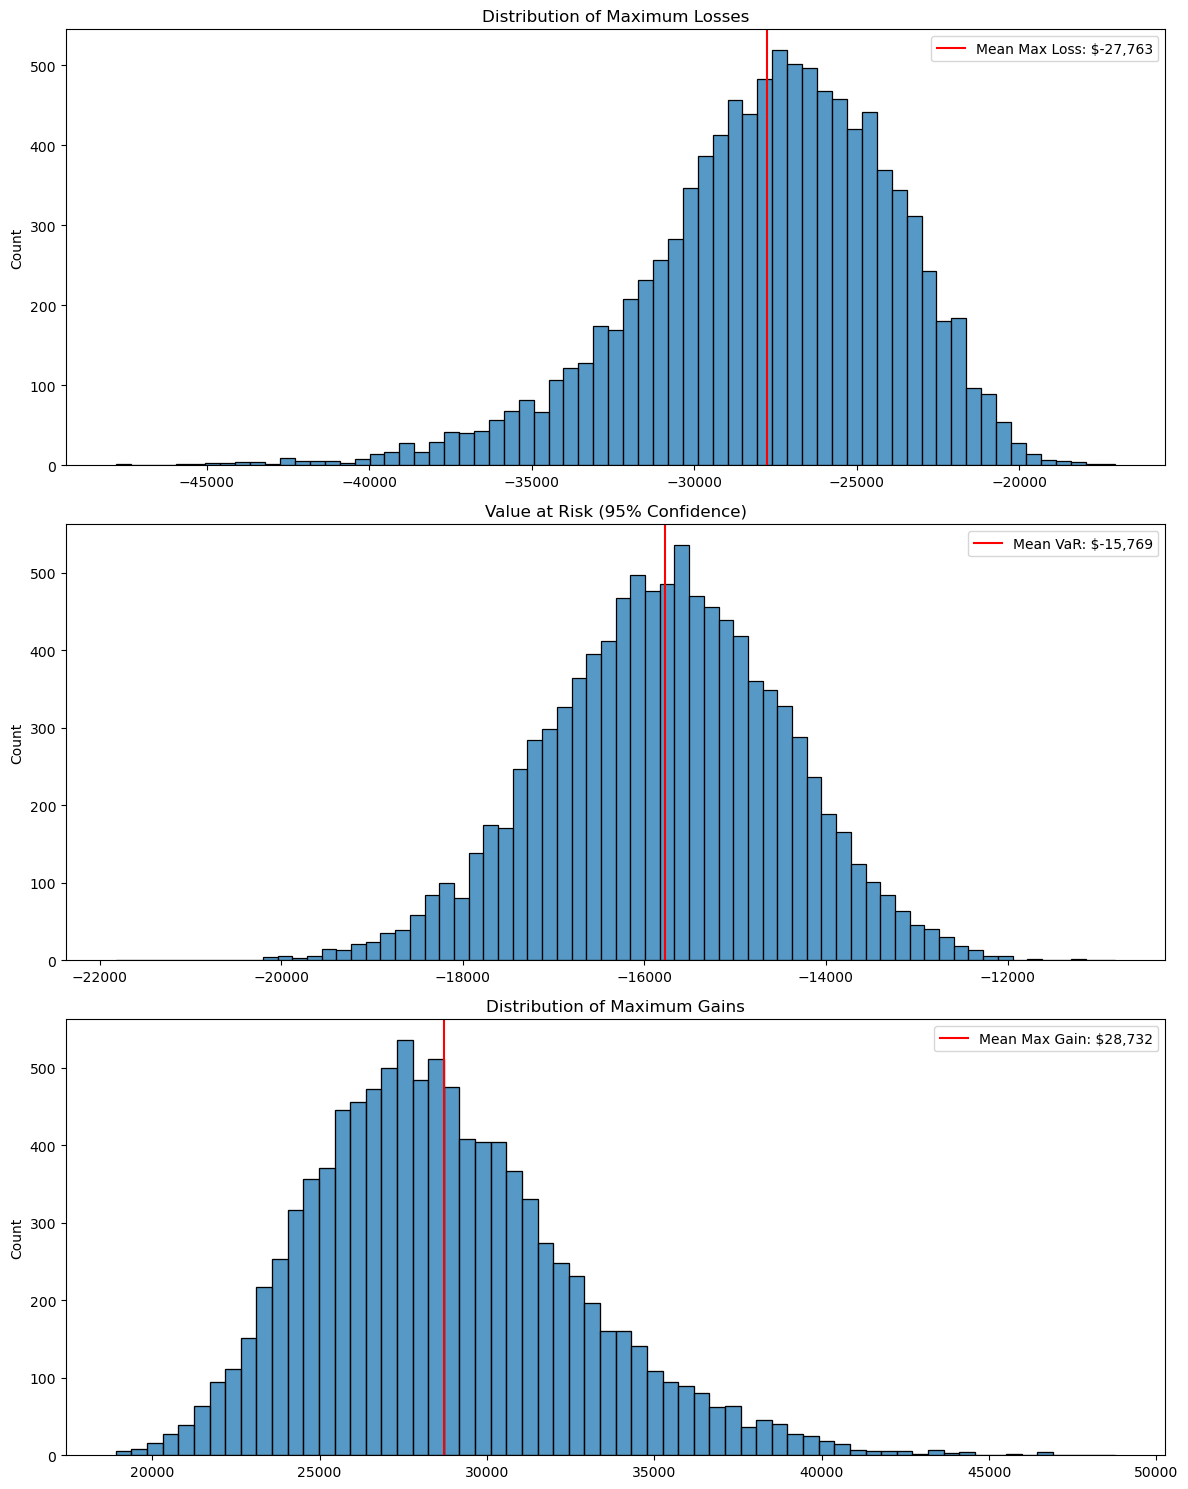

In [3]:

worst_case, var_95, best_case = analyze_portfolio_risk(returns)


In [4]:
def risk_management_summary(returns, initial_value=1000000):
    """Generate risk management summary"""
    worst_days = np.min(returns, axis=1) * initial_value
    best_days = np.max(returns, axis=1) * initial_value
    var_95 = np.percentile(returns, 5, axis=1) * initial_value
    
    print(f"Risk Management Summary for ${initial_value:,} Portfolio")
    print(f"Average worst-day loss: ${np.mean(worst_days):,.0f}")
    print(f"95% VaR: ${np.mean(var_95):,.0f}")
    print(f"Average best-day gain: ${np.mean(best_days):,.0f}")
    
    return worst_days, var_95, best_days

risk_summary = risk_management_summary(returns)

Risk Management Summary for $1,000,000 Portfolio
Average worst-day loss: $-27,763
95% VaR: $-15,769
Average best-day gain: $28,732


# Order Statistics in Financial Risk Management

## 1. Introduction to Financial Returns

### 1.1 What are Returns?
Returns represent the percentage change in asset value over a period:
- Daily returns: Change from one day to the next
- Can be positive (gains) or negative (losses)
- Usually expressed as decimals (0.02 = 2% return)

### 1.2 Statistical Properties of Returns
Financial returns typically exhibit:
- Approximately normal distribution in stable periods
- Fat tails (more extreme events than normal distribution)
- Slight negative skewness (losses can be more extreme than gains)
- Time-varying volatility (risk changes over time)

## 2. Simulating Financial Returns

```python
# Simulate daily returns
np.random.seed(42)
n_days = 252  # Trading days in a year
n_simulations = 10000  # Number of scenarios

# Parameters
daily_mean = 0.0005    # Expected daily return (≈ 12% annual)
daily_std = 0.01       # Daily volatility (≈ 16% annual)

# Generate returns
returns = np.random.normal(daily_mean, daily_std, 
                         (n_simulations, n_days))
```

### Understanding the Parameters:
- `daily_mean = 0.0005`: Modest positive expected return
- `daily_std = 0.01`: Typical stock market volatility
- `n_days = 252`: Standard trading year
- `n_simulations = 10000`: Large sample for stable estimates

## 3. Order Statistics in Risk Management

### 3.1 Minimum Returns (Worst-Case Analysis)
```python
worst_returns = np.min(returns, axis=1)
```

**Statistical Interpretation:**
- Order statistic: X₍₁₎ (minimum of each sample)
- Left tail of return distribution
- More extreme than normal distribution would suggest

**Financial Interpretation:**
- Maximum drawdown in a single day
- Stress testing scenario
- Capital adequacy assessment

Example:
```python
worst_case_loss = np.percentile(worst_returns, 5) * initial_value
print(f"95% confidence worst case: ${worst_case_loss:,.0f}")
```

### 3.2 Value at Risk (VaR)

**Statistical Definition:**
- Order statistic: X₍ᵢ₎ where i = α × n
- α = confidence level (typically 95% or 99%)
- Represents a specific percentile of returns

```python
def calculate_var(returns, confidence=0.95):
    """Calculate Value at Risk"""
    return np.percentile(returns, (1-confidence)*100, axis=1)

var_95 = calculate_var(returns)
```

**Financial Interpretation:**
- Maximum loss with given confidence
- Regulatory requirement
- Risk limit setting

Example for $1M portfolio:
```python
var_dollar = np.mean(var_95) * 1000000
print(f"95% VaR: ${var_dollar:,.0f}")
```

### 3.3 Maximum Returns (Upside Potential)
```python
best_returns = np.max(returns, axis=1)
```

**Statistical Interpretation:**
- Order statistic: X₍ₙ₎ (maximum of each sample)
- Right tail of return distribution
- Important for understanding potential gains

**Financial Interpretation:**
- Best possible scenario
- Performance bonus thresholds
- Option pricing inputs

## 4. Practical Risk Measures

### 4.1 Portfolio Risk Assessment
```python
def assess_portfolio_risk(returns, initial_value=1000000):
    """Complete risk assessment"""
    worst_case = np.min(returns, axis=1)
    var_95 = np.percentile(returns, 5, axis=1)
    best_case = np.max(returns, axis=1)
    
    metrics = {
        'Worst Case': worst_case,
        'VaR (95%)': var_95,
        'Best Case': best_case
    }
    
    for name, values in metrics.items():
        mean_value = np.mean(values) * initial_value
        std_value = np.std(values) * initial_value
        print(f"{name}:")
        print(f"  Mean: ${mean_value:,.0f}")
        print(f"  Std Dev: ${std_value:,.0f}")
```

### 4.2 Risk-Adjusted Performance Measures
Understanding extremes helps calculate:
- Sharpe Ratio (return per unit of risk)
- Maximum Drawdown (worst peak-to-trough decline)
- Sortino Ratio (focusing on downside risk)

## 5. Applications in Risk Management

### 5.1 Setting Stop-Loss Orders
Using minimum return distribution:
- Place stops beyond normal volatility
- Account for gap risk
- Balance protection vs. false triggers

### 5.2 Capital Requirements
Using VaR and minimum returns:
- Determine necessary cash reserves
- Plan for margin calls
- Structure contingency funding

### 5.3 Performance Attribution
Using maximum returns:
- Set realistic performance targets
- Design bonus structures
- Evaluate trading strategies

## 6. Key Insights

1. **Distribution Shapes Matter**
   - Returns are not perfectly normal
   - Extremes are more common than expected
   - Asymmetry between gains and losses

2. **Sample Size Effects**
   - Larger samples → more extreme minimums/maximums
   - More accurate VaR estimates
   - Better understanding of true risks

3. **Practical Implementation**
   - Use multiple risk measures
   - Consider time horizon effects
   - Account for changing market conditions


In [7]:
np.min(returns, axis=1)

array([-0.02569745, -0.03191267, -0.02646887, ..., -0.02312919,
       -0.0298443 , -0.03453225])